# Objectives:

1. Predict the Contract status based on available dataset.

2. Predict the Target variable- late payment- defaulter

3. EDA analysis to develop a basic understanding of risk analytics financial services.

4. Creating a Machine Learning predictive model on 'contract status' based on available dataset.

5. Understand and analyse the driving/Important variables behind loan default, i.e. the variables which are strong indicators of default.

6. Identify patterns which indicate the client has difficulty paying their installments,this ensure capable clients loan applications are not rejected.

# Importing libraries
Importing the libraries I will need and suppressing the warnings, as per advice from classes.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from scipy.stats import poisson
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

# 

## Importing data

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

# 

# Analysing datasets

### First dataset

In [17]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [23]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [19]:
dataT=pd.DataFrame(df_app.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_app.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,LIVE_CITY_NOT_WORK_CITY,2,int64
1,FLAG_DOCUMENT_18,2,int64
2,FLAG_DOCUMENT_14,2,int64
3,FLAG_MOBIL,2,int64
4,FLAG_EMP_PHONE,2,int64
5,FLAG_WORK_PHONE,2,int64
6,FLAG_CONT_MOBILE,2,int64
7,FLAG_PHONE,2,int64
8,FLAG_EMAIL,2,int64
9,FLAG_DOCUMENT_15,2,int64


### Second dataset

In [20]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [22]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [17]:
dataT=pd.DataFrame(df_pre.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_pre.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,NFLAG_INSURED_ON_APPROVAL,2,float64
1,NFLAG_LAST_APPL_IN_DAY,2,int64
2,FLAG_LAST_APPL_PER_CONTRACT,2,object
3,NAME_PRODUCT_TYPE,3,object
4,NAME_CLIENT_TYPE,4,object
5,NAME_CONTRACT_STATUS,4,object
6,NAME_PAYMENT_TYPE,4,object
7,NAME_CONTRACT_TYPE,4,object
8,NAME_PORTFOLIO,5,object
9,NAME_YIELD_GROUP,5,object


# 

# Data Preparation

### Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [6]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


#### I will set the Pandas display format for floating point numbers to two decimal places

In [33]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430062.00,1428936.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,482581.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430153.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,623757.00,1428254.00,1184536.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,746347.00,1426762.00,1426762.00,1426762.00,1426762.00,1430154.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1413701.00,1106483.00,1413701.00,1413700.00,664161.00,1094176.00,1413701.00,1413701.00,664161.00,4791.00,4791.00,1413701.00,1413701.00,1106488.00,852595.00,852595.00,852595.00,852595.00,852595.00,852595.00
mean,278470.25,0.09,0.40,173603.62,589338.59,27042.03,529443.48,0.02,-16314.95,68602.09,-5001.28,-3034.49,11.97,1.00,0.81,0.18,1.00,0.28,0.07,2.15,2.06,2.04,11.99,0.01,0.04,0.04,0.07,0.22,0.17,0.51,0.51,0.49,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.22,0.23,0.07,0.10,0.10,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.14,0.22,0.23,0.06,0.10,0.10,0.01,0.03,0.12,0.09,0.98,0.75,0.04,0.07,

# 

## Feature Selection

In [8]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 
         'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
         'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
         'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
         'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 
         'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1430155 non-null  int64  
 1   TARGET                      1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1430155 non-null  object 
 3   CODE_GENDER                 1430155 non-null  object 
 4   FLAG_OWN_CAR                1430155 non-null  object 
 5   FLAG_OWN_REALTY             1430155 non-null  object 
 6   CNT_CHILDREN                1430155 non-null  int64  
 7   AMT_INCOME_TOTAL            1430155 non-null  float64
 8   AMT_CREDIT_x                1430155 non-null  float64
 9   AMT_ANNUITY_x               1430062 non-null  float64
 10  NAME_INCOME_TYPE            1430155 non-null  object 
 11  NAME_EDUCATION_TYPE         1430155 non-null  object 
 12  NAME_FAMILY_STATUS          1430155 non-null  object 
 1

Now we have new dataset with 25 columns and 1430154 rows.

# 

## Visual Exploratory Data Analysis

#### Age group

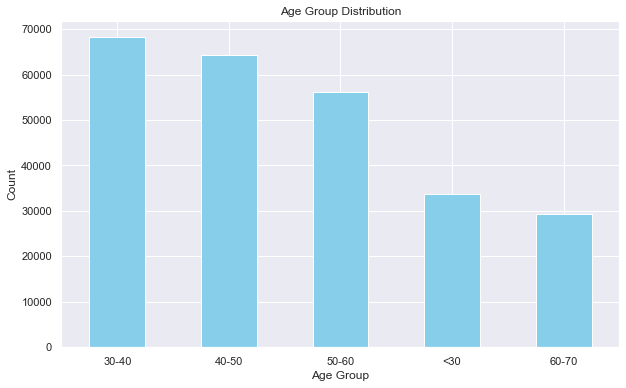

In [50]:
df['AGE_GROUP'] = pd.cut((df.DAYS_BIRTH.abs() / 365), [0, 30, 40, 50, 60, 70], 
                         labels=['<30', '30-40', '40-50', '50-60', '60-70'])
age_group_counts = df['AGE_GROUP'].value_counts()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Gender

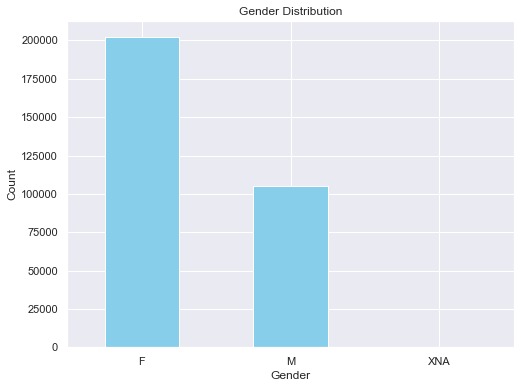

In [39]:
gender_counts = df_app['CODE_GENDER'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

#### Education type

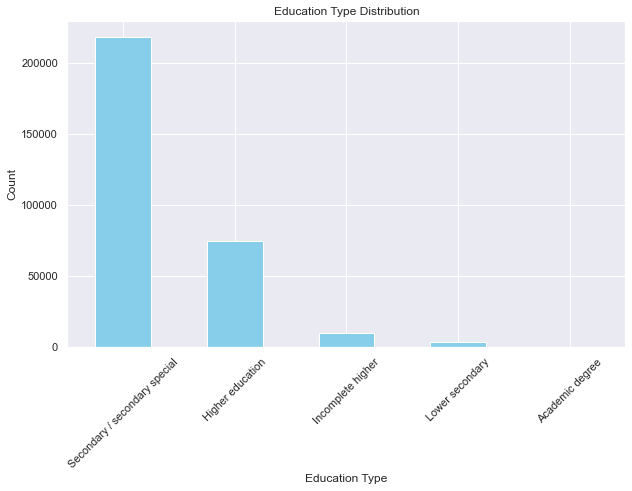

In [41]:
education_type_counts = df_app['NAME_EDUCATION_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
education_type_counts.plot(kind='bar', color='skyblue')
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

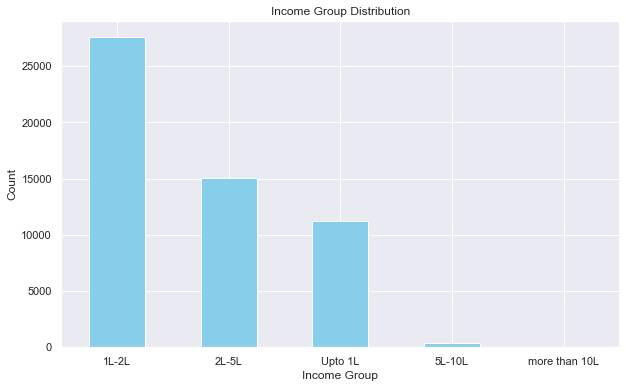

In [61]:
df['INCOME_GROUP'] = pd.cut(df_app.AMT_INCOME_TOTAL, [0, 100000, 200000, 500000, 1000000, 117000000],
                            labels=['Upto 1L', '1L-2L', '2L-5L', '5L-10L', 'more than 10L'])

# Get the value counts for 'INCOME_GROUP'
income_group_counts = df['INCOME_GROUP'].value_counts()

plt.figure(figsize=(10, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Observation:
1. Females are the majority availers of loan when compared with men.
2. Secondary education category is the highest availers of loan.
3. Age group 30-40 are the highest availers of loan and 60-70 age group is the lowest.

#### Distribution of age

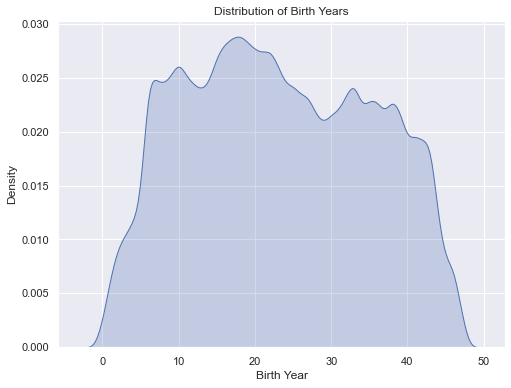

In [11]:
# Calculate birth years by converting 'DAYS_BIRTH' to positive years
df['birth_year'] = -df['DAYS_BIRTH'] // 365 + df['DAYS_BIRTH'].max() // 365

# Create a KDE plot for the distribution of birth years
plt.figure(figsize=(8, 6))
sns.kdeplot(df['birth_year'], shade=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Density')

plt.show()

#### Top 10 most common incomes compared to income median

*Wanted to add median of Incomes as a red line but wasn't succesful, will try more as it's good to compare most common incomes with median income.

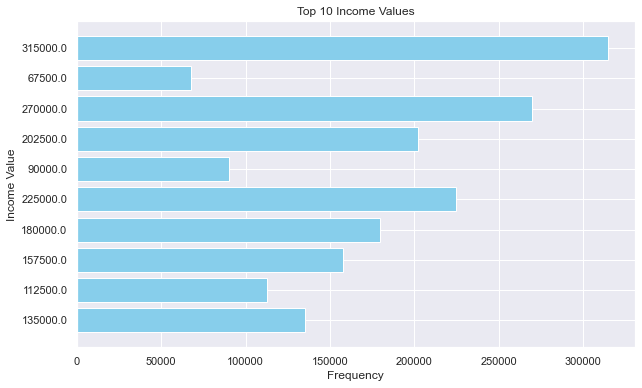

In [12]:
# Get the top 10 income values
top_10_incomes = df['AMT_INCOME_TOTAL'].value_counts().index[:10]

# Create a bar plot with income values on the y-axis
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_incomes)), top_10_incomes, color='skyblue')
plt.title('Top 10 Income Values')
plt.ylabel('Income Value')
plt.xlabel('Frequency')

# Set y-axis labels as income values
plt.yticks(range(len(top_10_incomes)), top_10_incomes)

plt.show()

## Processing NaN values

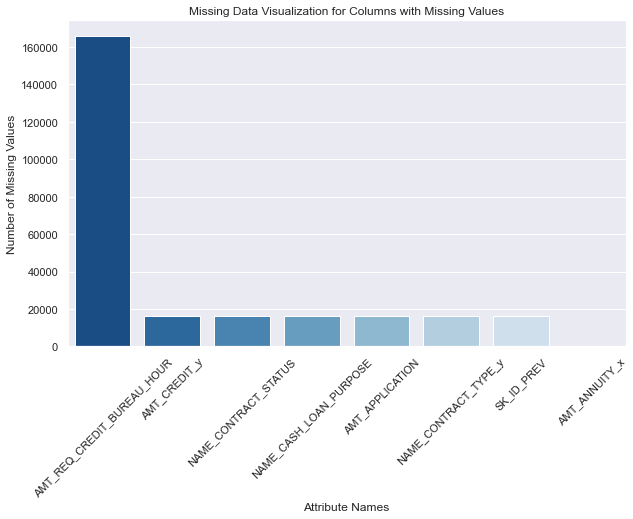

In [14]:
missing_counts = df.isnull().sum().sort_values(ascending=False)

missing_counts = missing_counts[missing_counts > 0]

colors = list(reversed(sns.color_palette("Blues", len(missing_counts))))

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts, palette=colors)
plt.title('Missing Data Visualization for Columns with Missing Values')
plt.xlabel('Attribute Names')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')

plt.show()

## Removing NaN values
Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [15]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

264630

In [16]:
df = df.dropna()

In [17]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

0

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [18]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

998275

In [19]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251712 entries, 0 to 1430147
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  251712 non-null  int64   
 1   TARGET                      251712 non-null  int64   
 2   NAME_CONTRACT_TYPE_x        251712 non-null  object  
 3   CODE_GENDER                 251712 non-null  object  
 4   FLAG_OWN_CAR                251712 non-null  object  
 5   FLAG_OWN_REALTY             251712 non-null  object  
 6   CNT_CHILDREN                251712 non-null  int64   
 7   AMT_INCOME_TOTAL            251712 non-null  float64 
 8   AMT_CREDIT_x                251712 non-null  float64 
 9   AMT_ANNUITY_x               251712 non-null  float64 
 10  NAME_INCOME_TYPE            251712 non-null  object  
 11  NAME_EDUCATION_TYPE         251712 non-null  object  
 12  NAME_FAMILY_STATUS          251712 non-null  object  
 13  NAM

#### Our finalised dataset consist of 251712 rows in 25 columns.

### Converting negative values to absolute values

In [20]:
cols_with_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
df[cols_with_negative] = df[cols_with_negative].abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,birth_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,0.0,1038818.0,Consumer loans,179055.0,179055.0,XAP,Approved,<30,4
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,0.0,1810518.0,Cash loans,900000.0,1035882.0,XNA,Approved,40-50,24
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,0.0,1564014.0,Consumer loans,24282.0,20106.0,XAP,Approved,50-60,31
14,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,0.0,2001242.0,Cash loans,180000.0,180000.0,XNA,Approved,50-60,33
20,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,0.0,2218188.0,Consumer loans,162598.5,162598.5,XAP,Approved,40-50,25


In [21]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,birth_year
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,0.0,1038818.0,Consumer loans,179055.0,179055.0,XAP,Approved,<30,4
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,0.0,1810518.0,Cash loans,900000.0,1035882.0,XNA,Approved,40-50,24
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,0.0,1564014.0,Consumer loans,24282.0,20106.0,XAP,Approved,50-60,31
14,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,0.0,2001242.0,Cash loans,180000.0,180000.0,XNA,Approved,50-60,33
20,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,0.0,2218188.0,Consumer loans,162598.5,162598.5,XAP,Approved,40-50,25


### Getting number and names of the object columns

In [22]:
obj_cols = df.select_dtypes(include='object')
num_obj_cols = obj_cols.shape[1]
num_obj_cols

9

In [23]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS']

### Getting all unique values for each object column 

In [24]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [25]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [26]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [27]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [28]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [29]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [30]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Buying a new car', 'Medicine',
       'Furniture', 'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Payments on other loans', 'Buying a home', 'Business development',
       'Journey', 'Gasification / water supply', 'Buying a garage',
       'Hobby', 'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

In [31]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Replacing all categorical variables with numeric values

In [32]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 
                 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 
                 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 
                 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 
                 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 
                 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 
                 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 
                 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 
                 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 
                 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 
                 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 0, 'Unused offer': 0})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,AGE_GROUP,birth_year
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,1,0,0,0,0.018801,9461,637,3648.0,0.0,1038818.0,2,179055.0,179055.0,0,1,<30,4
1,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,2,1,1,0,0.003541,16765,1188,1186.0,0.0,1810518.0,0,900000.0,1035882.0,3,1,40-50,24
4,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,1,0,0,0,0.010032,19046,225,4260.0,0.0,1564014.0,2,24282.0,20106.0,0,1,50-60,31
14,100007,0,0,0,0,1,0,121500.0,513000.0,21865.5,1,0,0,0,0.028663,19932,3038,4311.0,0.0,2001242.0,0,180000.0,180000.0,3,1,50-60,33
20,100008,0,0,0,0,1,0,99000.0,490495.5,27517.5,2,0,1,0,0.035792,16941,1588,4970.0,0.0,2218188.0,2,162598.5,162598.5,0,1,40-50,25


#### Our dataset is now completely filled with numerical values only

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Approved': 1, 'Refused': 0, 'Canceled': 0, 'Unused offer': 0 (NAME_CONTRACT_STATUS is our target column where we see if customer was successful or not with application. In this case, 1 stands for Approved and that's successful customer why all other outcomems are unsuccessful, therefore 0.)


# 

## Bivariate Analysis¶

In [41]:
def bivariate_scatter(variable_x, variable_y, label_orientation=False):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 1], x=variable_x, y=variable_y, ax=ax1)
    ax1.set_title('DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    
    sns.scatterplot(data=df_app[df_app['TARGET'] == 0], x=variable_x, y=variable_y, ax=ax2)
    ax2.set_title('NON-DEFAULTERS')
    if label_orientation:
        plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

#### Bivariate Analysis with Target Variable 

A scatter plot is used to understand the correlation between two numeric variables with Target variable.


Income vs Credit

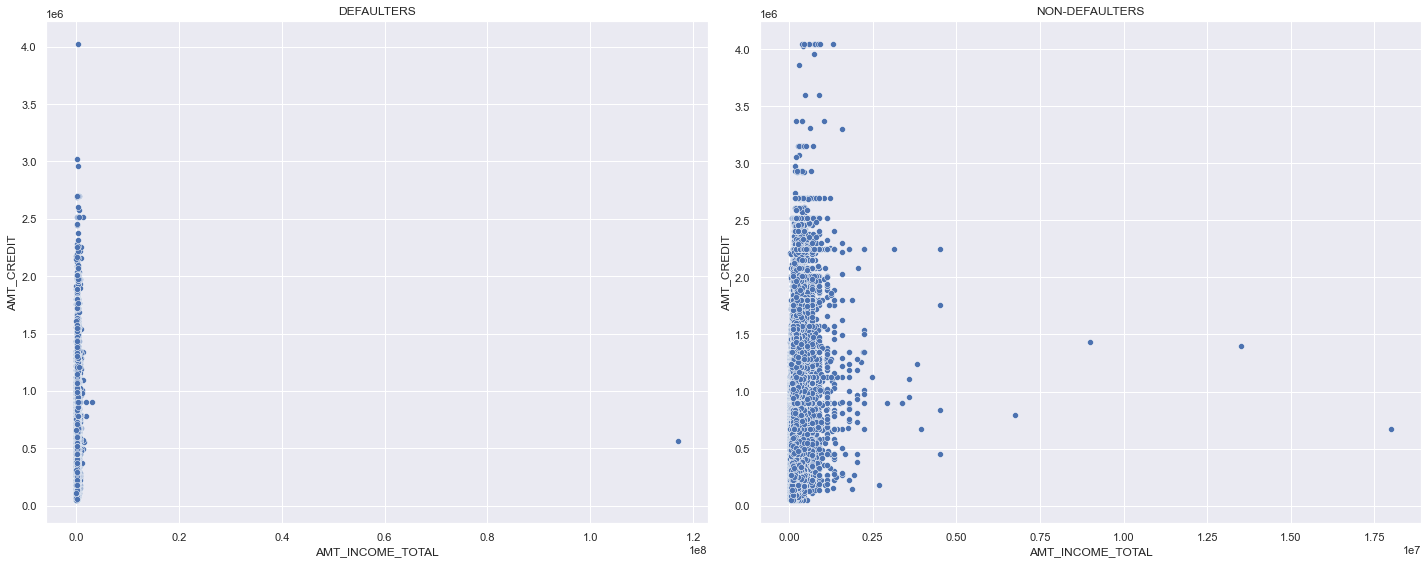

In [42]:
bivariate_scatter('AMT_INCOME_TOTAL','AMT_CREDIT')

Observations:

Payment defaulters are majority low income group people.

Also, higher credit amount is given for low income people than higher income people.

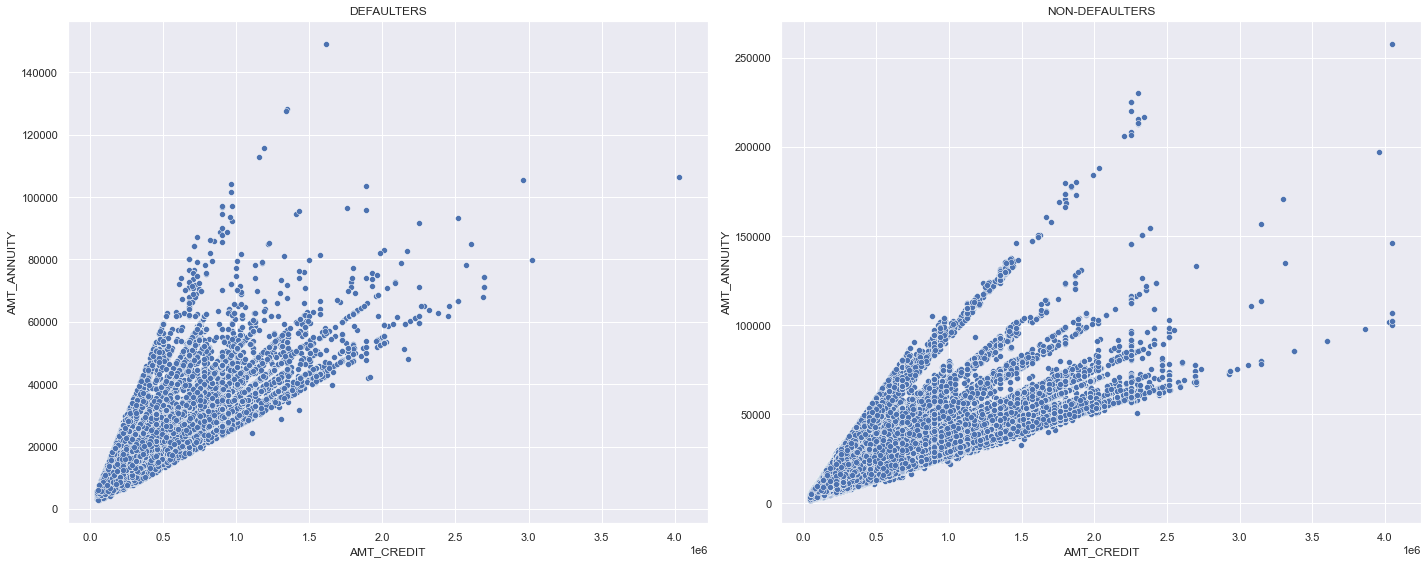

In [43]:
bivariate_scatter('AMT_CREDIT','AMT_ANNUITY')

Observations:Positive correlation observed between credit and annuity 

#### Analysising the continuous variables with target variable

In [44]:
#defining plotting function for box plots
def boxplot_target(variable,label_orientation=False):
    
    #setting subplots & fig size
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,4))
    
    #plot1
    sns.boxplot(ax=ax1,data=df_app[df_app['TARGET']==1],x=variable,showfliers=False)
    ax1.set_title('DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    #plot2
    sns.boxplot(ax=ax2,data=df_app[df_app['TARGET']==0],x=variable,showfliers=False)
    ax2.set_title('NON-DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)

    plt.show()

In [45]:
df_app['DAYS_EMPLOYED']=abs(df_app.DAYS_EMPLOYED)//365

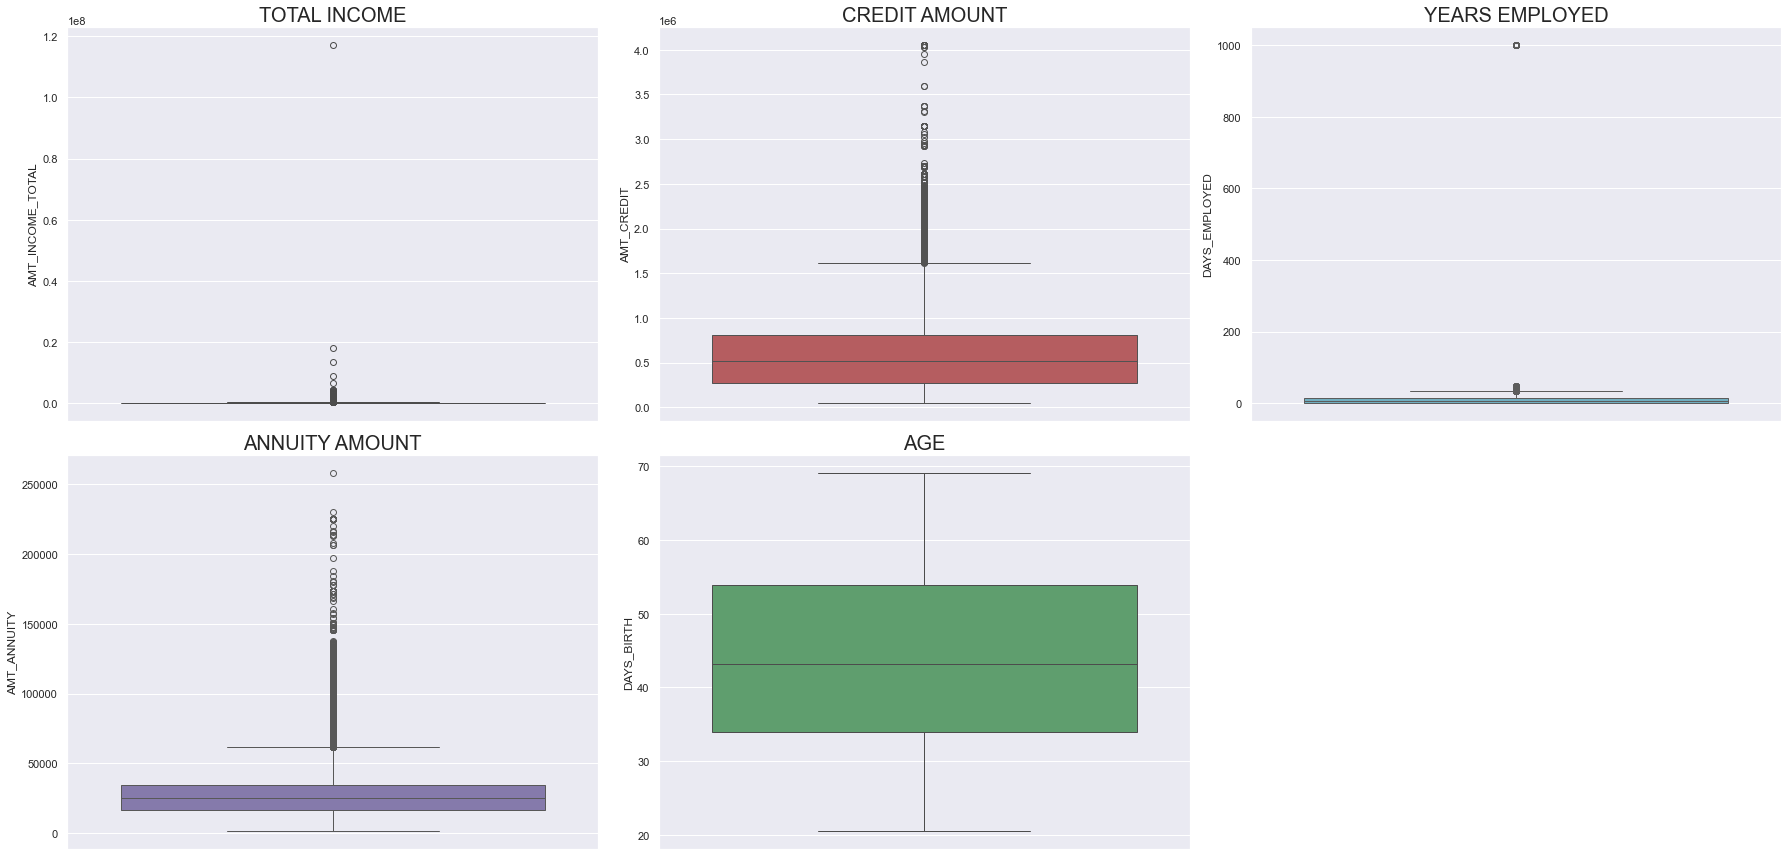

In [46]:
#Setting plot size
plt.figure(figsize = (25, 18))

#Creating Subplots

#1.Total Income
plt.subplot(3,3,1)
plt.title("TOTAL INCOME", fontsize=20)
sns.boxplot(df_app.AMT_INCOME_TOTAL,color='g')

#2.Credit Amount
plt.subplot(3,3,2)
plt.title("CREDIT AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_CREDIT,color='r')

#3.Days Employed
plt.subplot(3,3,3)
plt.title("YEARS EMPLOYED", fontsize=20)
sns.boxplot(df_app.DAYS_EMPLOYED,color='c')

#4.Annuity Amount
plt.subplot(3,3,4)
plt.title("ANNUITY AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_ANNUITY,color='m')

#5.Age
plt.subplot(3,3,5)
plt.title("AGE", fontsize=20)
sns.boxplot(abs(df_app.DAYS_BIRTH)/365,color='g')


plt.tight_layout()
plt.show()

Observation:Days of  having one outliner with value 1000 years.
Annual credit and Annual income has couple of outliners

#### Days of employment with Target variable

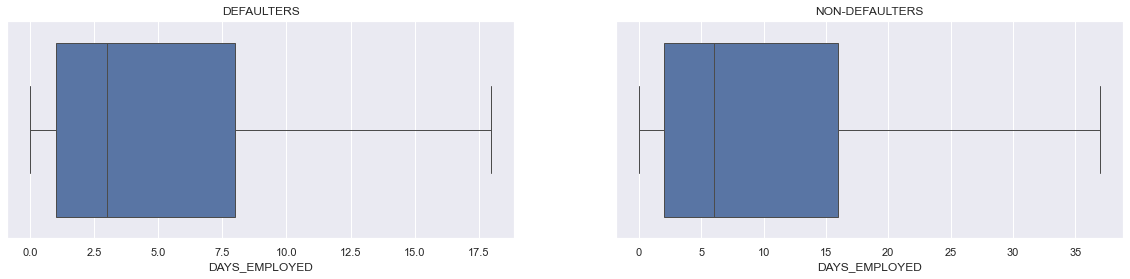

In [47]:
boxplot_target('DAYS_EMPLOYED',label_orientation=False)

Observation:Payment Defaulters have been employed for an average of less than 3 years and. having one outliner with value 1000 years
Repayers are employed for an average of 5+ years

 #### Annual Income with Target variable

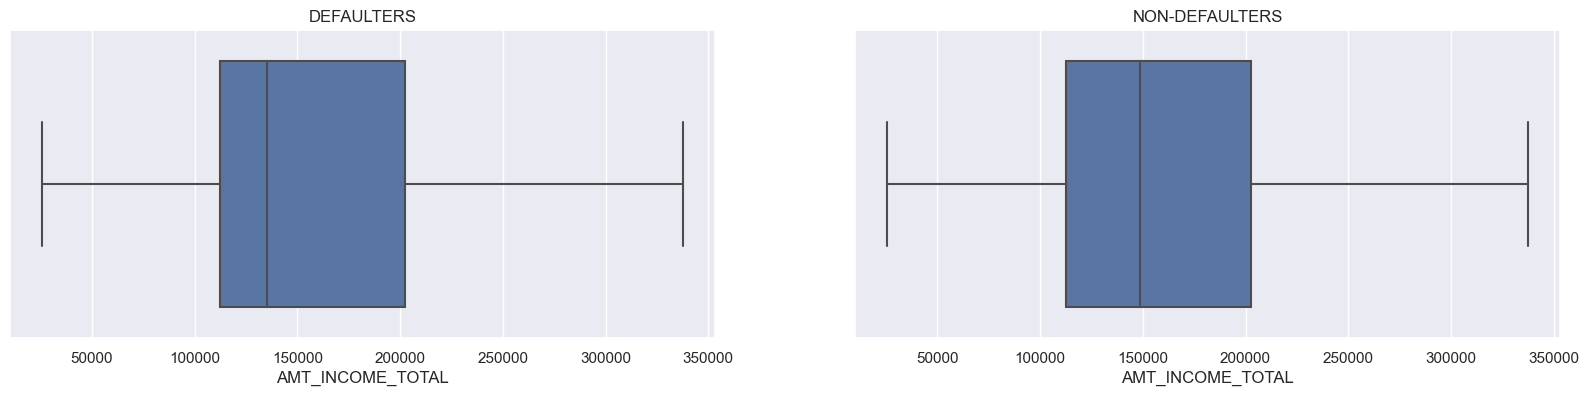

In [31]:
boxplot_target('AMT_INCOME_TOTAL',label_orientation=False)

In [67]:
#defining plotting functions
def bivariate_pivot(val,ind,col,title,label_orientation=False):
    
    #pivot table function
    table1=pd.pivot_table(data=df,values=val,index=ind,columns=col,aggfunc=np.mean)
    table1.plot(kind='bar',stacked='True',figsize=[20,10])
    plt.title(title)
    if(label_orientation==True):
        plt.xticks(rotation=45)
    plt.show() 
    print(table1)
    print(' ')
    print(df[ind].value_counts())

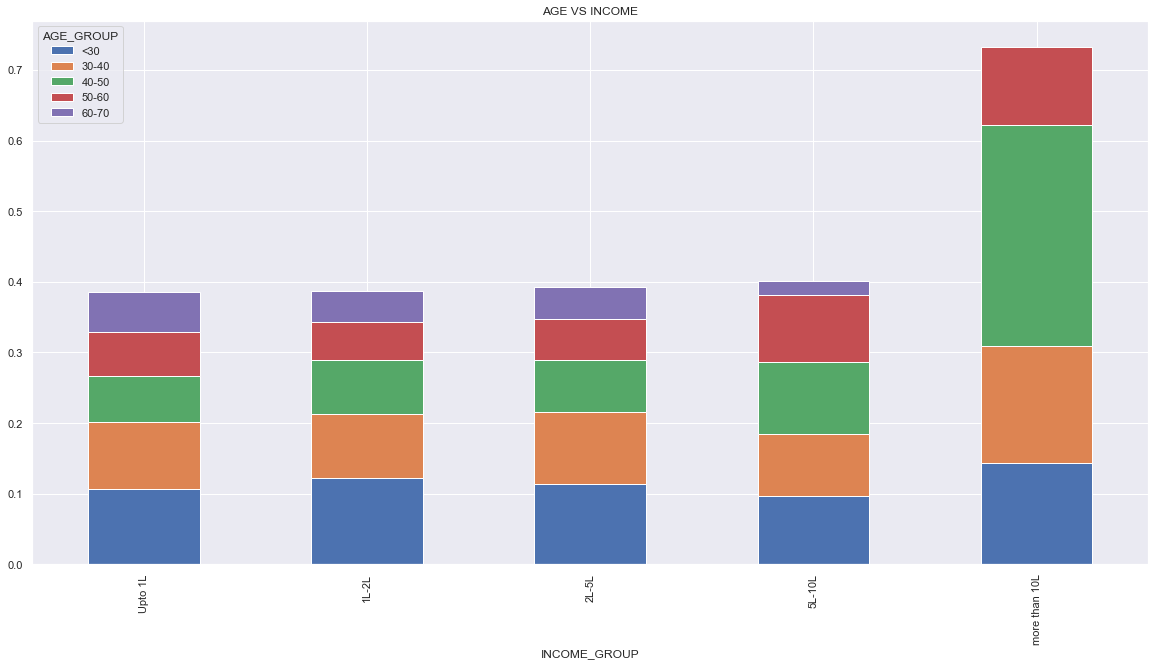

AGE_GROUP           <30     30-40     40-50     50-60     60-70
INCOME_GROUP                                                   
Upto 1L        0.106719  0.094148  0.065887  0.062722  0.056648
1L-2L          0.121669  0.090933  0.076076  0.054227  0.044256
2L-5L          0.113083  0.102755  0.072834  0.058858  0.045195
5L-10L         0.097222  0.086957  0.102273  0.094737  0.019608
more than 10L  0.142857  0.166667  0.312500  0.111111  0.000000
 
INCOME_GROUP
1L-2L            27634
2L-5L            15043
Upto 1L          11206
5L-10L             421
more than 10L       56
Name: count, dtype: int64


In [68]:
bivariate_pivot("TARGET",'INCOME_GROUP','AGE_GROUP','AGE VS INCOME')

Observation: Age group of <30 earning less than 1Lakh are most likely to have payment difficulties.
Income group 5L-10L shows the least chances of payment difficulty.
Income group 'more than 10L' are outliers, thus considering them as isolated events.

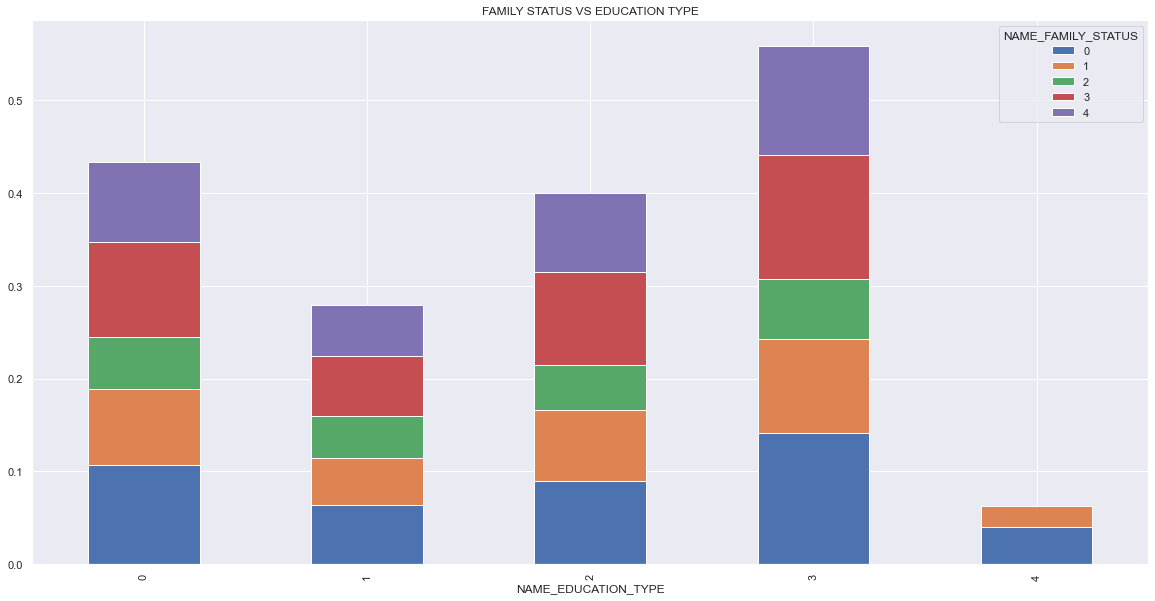

NAME_FAMILY_STATUS          0         1         2         3         4
NAME_EDUCATION_TYPE                                                  
0                    0.106447  0.082217  0.056082  0.103011  0.085803
1                    0.063870  0.050190  0.045478  0.064903  0.055332
2                    0.089339  0.077105  0.047945  0.100342  0.085653
3                    0.141531  0.101073  0.064706  0.133333  0.117647
4                    0.040000  0.022989  0.000000  0.000000  0.000000
 
NAME_EDUCATION_TYPE
0    179760
1     60632
2      8159
3      3027
4       134
Name: count, dtype: int64


In [69]:
bivariate_pivot("TARGET",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','FAMILY STATUS VS EDUCATION TYPE')

Observation:
    Lower secondary education-Civil Marriage & Single people are the most risky category exhibiting payment difficulty.
Widows have shown less percentage of payment difficulty through all Education types.
Academic degree Education type shows less chances of payment difficulty.

# 

# Defining the problem statement:

### 1. Problem statement
Create a Predictive model which can tell if application contract status is sucessful or not?

Target Variable: Contract_Status
   
Successful = 1 Application is successful
Unsuccessful = 0 Application is unsuccessful

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

### 2. Problem statement

Create a Predictive model which can tell if application Target status - late payment/Defaulters  or not ?

Target Variable: Target
   
Defaulter = 1 - late payment of loan
Non_Defaulter = 0 - non late payment of loan

### Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

# 

# Machine Learning

### Objective - Predict the contract_status

In [71]:
models = ['Decision Tree','Logistic Regression', 'Random Forest', 'KNN']
Prediction=['Contract_status','Target','Target','Target']

scores = []

# 

# Decision Tree Model

### Feature selection

In [73]:
feature_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 
                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
                'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 
                'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now, I will use RFE method to rank the importance of features in my dataset. Attributes with lower ranking means those are of higher importance. 

In [74]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

importance = rfe.ranking_
importance

array([13, 15, 14, 10,  5,  2,  1, 11,  9,  7, 12,  4,  1,  1,  1, 16,  6,
        3,  1,  8])

In [76]:
col_names = X.columns

feat_ranks = list(zip(col_names, rfe.ranking_))

feat_ranks_sorted = sorted(feat_ranks, key=lambda x: x[1])

for i, (col, rank) in enumerate(feat_ranks_sorted):
    print(f"{i+1}. {col}: {rank}")

1. AMT_ANNUITY_x: 1
2. DAYS_BIRTH: 1
3. DAYS_EMPLOYED: 1
4. DAYS_REGISTRATION: 1
5. AMT_CREDIT_y: 1
6. AMT_CREDIT_x: 2
7. AMT_APPLICATION: 3
8. REGION_POPULATION_RELATIVE: 4
9. AMT_INCOME_TOTAL: 5
10. NAME_CONTRACT_TYPE_y: 6
11. NAME_FAMILY_STATUS: 7
12. NAME_CASH_LOAN_PURPOSE: 8
13. NAME_EDUCATION_TYPE: 9
14. CNT_CHILDREN: 10
15. NAME_INCOME_TYPE: 11
16. NAME_HOUSING_TYPE: 12
17. CODE_GENDER: 13
18. FLAG_OWN_REALTY: 14
19. FLAG_OWN_CAR: 15
20. AMT_REQ_CREDIT_BUREAU_HOUR: 16


I will use features that are within top 3 in importance.

In [80]:
feature_cols = ['AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'AMT_CREDIT_y', 'AMT_APPLICATION', 'AMT_INCOME_TOTAL']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Splitting dataset into training set and test set (70% training and 30% test)

In [ ]:
# Create a decision tree classifier with a specified criterion (e.g., 'gini' for Gini impurity)
clf = DecisionTreeClassifier(criterion='gini')

# Fit the model to your data (X and y)
clf.fit(X, y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [80]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 8), (251712,), (176198, 8), (75514, 8), (176198,), (75514,))

In [81]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

### Evaluating Model - how often is the classifier correct?

In [82]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8760627168472072


In [83]:
scores.append(clsf.score(X_test,y_test))

### Calculating Train and Test score

In [84]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.877478745502219
Test set score: 0.8760627168472072


Scores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

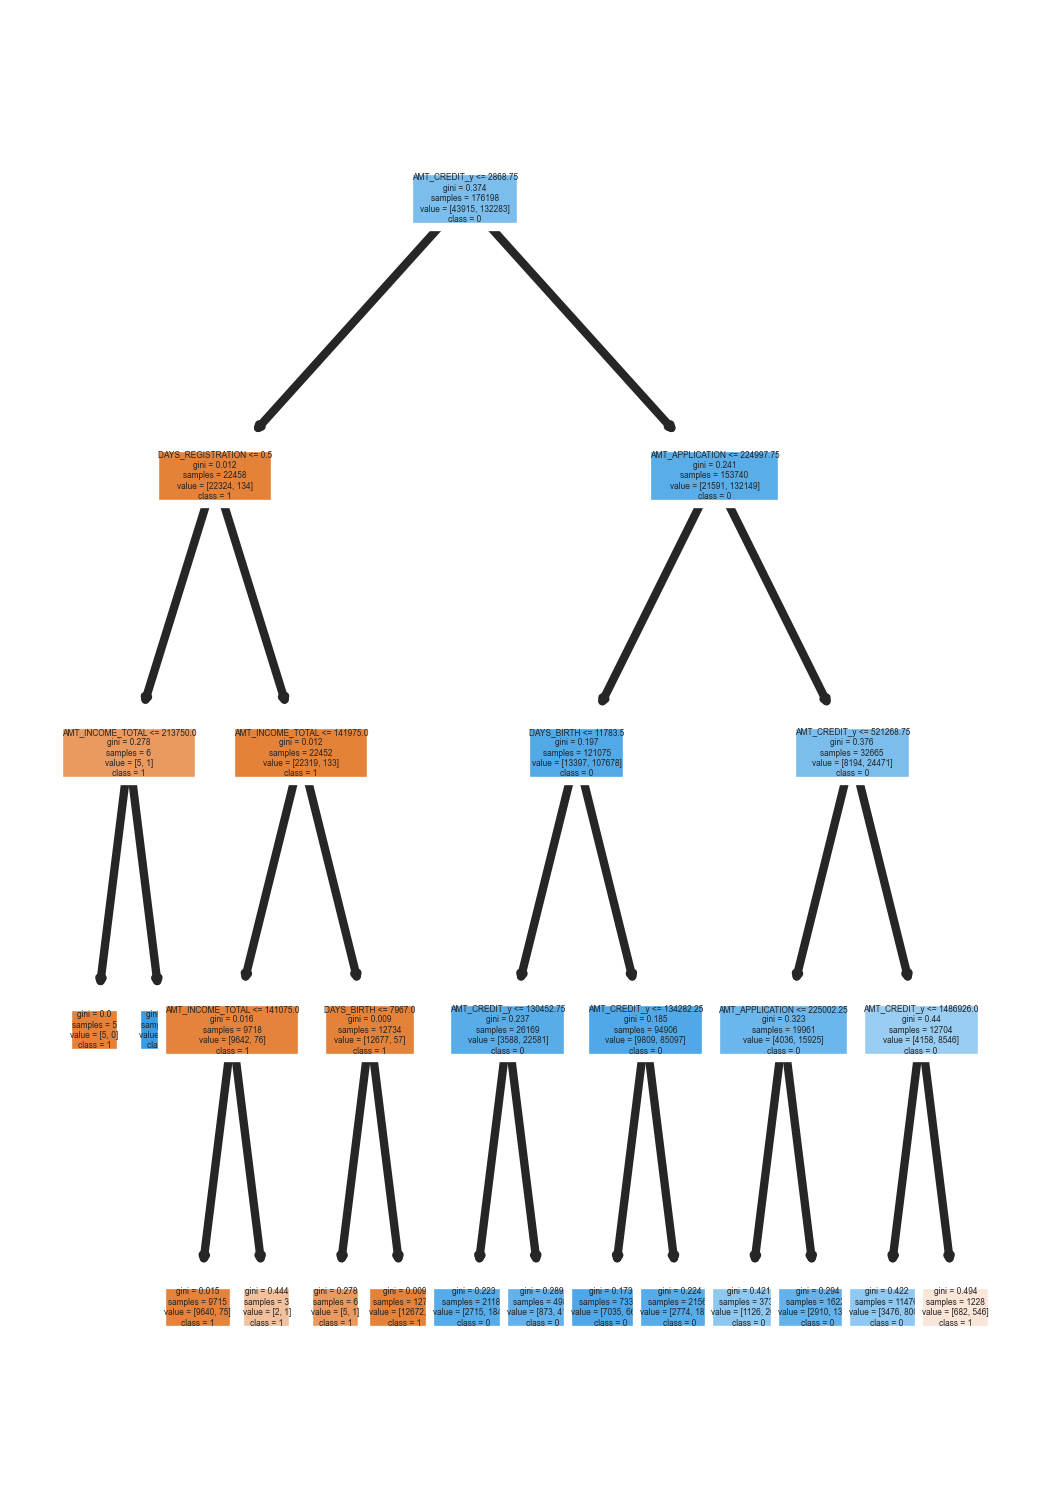

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2, 3), dpi=600)
tree.plot_tree(clsf, feature_names=feature_cols, class_names=df.NAME_CONTRACT_STATUS.unique().astype('str'), ax=axes, filled=True);
plt.show()

# PCA
Before starting with PCA, I will scale the data.

In [87]:
#Divide the dataset in X and y according to the dependent variable "TARGET".
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [88]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 24), (251712,), (188784, 24), (62928, 24), (188784,), (62928,))

In [89]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.93170692 -0.31683361  0.70743549 ... -0.49659775 -0.56117291
   0.57744813]
 [-0.16494003  3.15623083 -1.41335439 ... -0.06050537 -0.56117291
   0.57744813]
 [-0.28496035 -0.31683361 -1.41335439 ... -0.40576506 -0.56117291
   0.57744813]
 ...
 [ 0.08515009 -0.31683361  0.70743549 ...  0.11424759 -0.56117291
  -1.73175726]
 [ 0.29156289 -0.31683361  0.70743549 ... -0.20686796 -0.56117291
  -1.73175726]
 [-0.05176191 -0.31683361  0.70743549 ... -0.25007068 -0.56117291
   0.57744813]] 	 [[-0.09849101 -0.31683361  0.70743549 ...  0.31059367  1.12004819
   0.57744813]
 [ 0.55943884  3.15623083 -1.41335439 ... -0.46565638 -0.56117291
   0.57744813]
 [-0.82375432 -0.31683361  0.70743549 ... -0.18560399  1.12004819
   0.57744813]
 ...
 [-0.04386033 -0.31683361  0.70743549 ... -0.6209393   1.12004819
  -1.73175726]
 [ 0.25595236 -0.31683361 -1.41335439 ... -0.53194992 -0.56117291
   0.57744813]
 [ 0.90449363 -0.31683361  0.70743549 ... -0.21113063 -0.56117291
   0.57744813]] 	 [[-1.7298985

In [90]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 20)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (251712, 24)
Reduced shape: (251712, 20)


In [91]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.23593176 0.09778841 0.08138251 0.06352726 0.04917687 0.04135683
 0.03986078 0.03574929 0.03455154 0.03369734 0.03335838 0.03320271
 0.03244995 0.03021938 0.02731968 0.02650926 0.02582696 0.02128384
 0.02068347 0.01442387]


In [92]:
#pip install mglearn

Text(0, 0.5, 'cumulative explained variance')

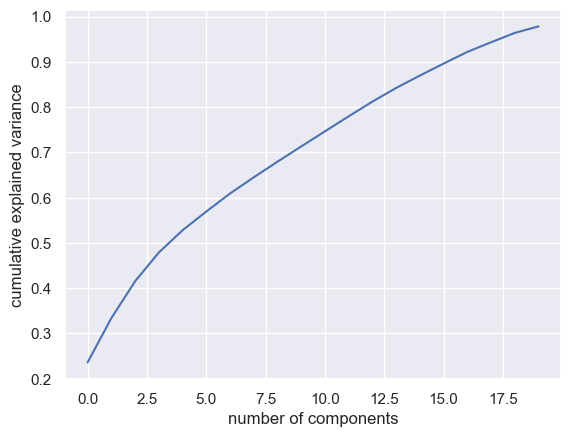

In [93]:
#apply PCA to determinate principle components which hold 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:>

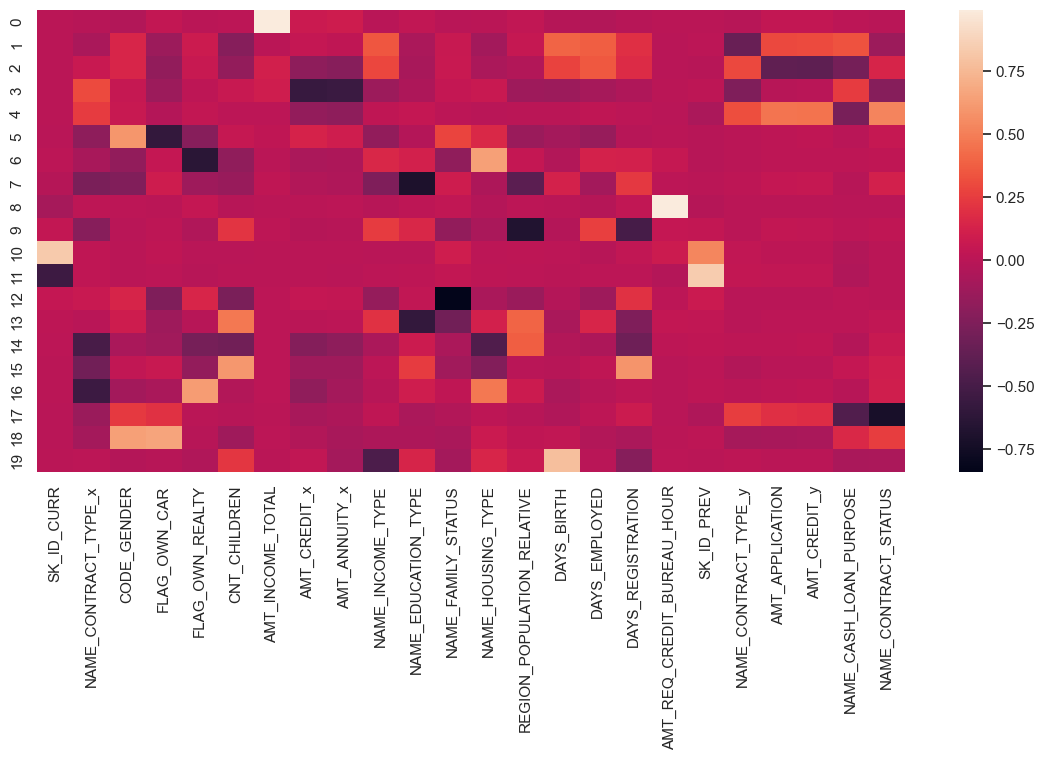

In [94]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# Model Building
# Objective 1 - fitting Classification model to predict the target value.

Logistic Regression



In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_scaled, y_train)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[57967,     0],
       [ 4961,     0]])

In [96]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9211638698194762 0.0


In [97]:
#!pip install imblearn
#!pip install --upgrade scikit-learn
#!pip install --upgrade threadpoolctl

In [98]:
# SMOTE - applying SMOTE to balance the datapoint since target variable has more 'No' datapoints than 'Yes'
from imblearn.over_sampling import SMOTE 

smt = SMOTE()

X_train_bal, y_train_bal = smt.fit_resample(X_train_scaled, y_train)

In [99]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[35258, 22709],
       [ 2013,  2948]])

In [100]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.607138316806509 0.5942350332594235


In [101]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {
   'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
   'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 3)
clf.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [102]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

We can get accuracy of 0.6134651519591787 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [103]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.02,0.01,0.00,0.00,0.00,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,NaN,NaN,NaN,42
1,0.01,0.00,0.00,0.00,0.00,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,30
2,0.29,0.03,0.01,0.00,0.00,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.61,0.62,0.61,0.61,0.00,28
3,0.71,0.02,0.01,0.00,0.00,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.61,0.62,0.61,0.61,0.00,25
4,0.23,0.00,0.01,0.00,0.00,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.61,0.62,0.61,0.61,0.00,25
5,0.32,0.02,0.01,0.00,0.00,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.61,0.62,0.61,0.61,0.00,24
6,0.01,0.00,0.00,0.00,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,NaN,NaN,NaN,41
7,0.01,0.00,0.00,0.00,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,33
8,0.44,0.02,0.01,0.00,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.61,0.62,0.61,0.61,0.00,25
9,0.73,0.04,0.01,0.00,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.61,0.62,0.61,0.61,0.00,21


In [104]:
# LogisticRegression best fit and check the test and train accuracy 
logreg = LogisticRegression(C= 0.01, penalty='l1', solver= 'liblinear')
logreg.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred1 = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred1)

array([[35258, 22709],
       [ 2013,  2948]])

In [105]:
accuracy = accuracy_score(y_test, y_pred1)

recall = recall_score(y_test, y_pred1)

print(accuracy, recall)

0.607138316806509 0.5942350332594235


In [106]:
scores.append(logreg.score(X_test_scaled,y_test))

Randomforest



In [107]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [108]:
# fit
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier()

RandomForestClassifier()


In [109]:
# Making predictions
predictions = rfc.predict(X_test_scaled)

In [110]:
print(confusion_matrix(y_test,predictions))

[[56869  1098]
 [ 4734   227]]


In [111]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)

0.9073226544622426 0.045756903850030235


In [112]:
#GridSearchCV to find optimal n_estimators #Takes ages to load
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

 #instantiate the model
rf = RandomForestClassifier()



In [113]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=10,
                             n_estimators=100)

In [116]:
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=10, max_features=10)

In [117]:
# predict
predictions = rfc.predict(X_test_scaled)

In [118]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)


0.7594234680905162 0.36484579721830274


In [119]:
scores.append(rfc.score(X_test_scaled,y_test))

KNN Classification

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [121]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9230549199084668


In [124]:
scores.append(model.score(X_test,y_test))

### Evalution:

In [128]:
modelComparison = pd.DataFrame()

modelComparison['Test Score'] = scores
modelComparison['Prediction']= Prediction
modelComparison.index = models
modelComparison

,Test Score,Prediction
Decision Tree,0.88,Contract_status
Logistic Regression,0.61,Target
Random Forest,0.76,Target
KNN,0.92,Target


### Conclusion